# Advance Section Activities (ML Classification Techniques):


### Andy and Juan Notes to Complete in Notebook
### Delete once finished
1. ML basics
    * Explain what training means
    * Explain overfitting / variance
    * Evaluation on testing data
* Logistic Regression or Classification 
    * Use age vs. (other)
* Clustering
    * K nearest neighbor 
    * Gaussian Mixture Model 
    * DBSCAN (density based)
    * Explain strengths / weaknesses of each
* Use dimension reduction to visualize clusters
    * Briefly explain dimension reduction
    * Add label coloring to clusters
* SVM??


# Overview

This is the expert level notebook for the Data Science (DS) and Machine Learning (ML) FredHutch.io tutorial, where we will work through beginning to end on different aspects and techniques in DS and ML for Research and Analysis.

In this notebook we will work through Machine Learning techniques and strategies on the genes data (datasets available [here](https://www.dropbox.com/sh/jke9h4km90ner9l/AAD1UyucvlXIFbKTjl-D15U6a?dl=0)) from the same five cancer types (BRCA, KIRC, COAD, LUAD, PRAD) from the TCGA projects available from the [National Cancer Institute's Genomic Data Commons](https://gdc.cancer.gov/). 

We will keep working with *python libraries* introduced in the Beginner and Intermediate Tutorials and introduce some new libraries with special purposes in **Machine Learning**.
> **Libraries Used in This Tutorial**
* Data Manipulation and Processing
     - [pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Data Visualization
	- [Matplotlib](https://matplotlib.org/)
    - [Seaborn](https://seaborn.pydata.org/)
    - [Altair](https://altair-viz.github.io/)
* Statistics
    - [Scipy](https://www.scipy.org/)
    - [Statsmodels](https://www.statsmodels.org/stable/index.html)
* Machine Learning
    - [Scikit-Learn](https://scikit-learn.org/stable/)
    
In this notebook we will be focusing specifically on Machine Learning modeling in **python**. We'll primariy focus in:
* Introducing what Machine Learning is
* Fundamental concepts and techniques in ML
* Introduce and familiarize with using **Scikit-Learn**
* Fundamental categories of models
* Some specific examples with regression and clustering ML models.

# Table of Contents
[1. Backgroud on Machine Learning: What is Machine Learning?](#1.-Backgroud-on-Machine-Learning:-What-is-Machine-Learning?)
* [1.1 Types of Machine Learning Models](#1.1-Types-of-Machine-Learning-Models)
    * [1.1.1 Supervised Machine Learning](#1.1.1-Supervised-Machine-Learning)
    * [1.1.2 Unsupervised Machine Learning](#1.1.2-Unsupervised-Machine-Learning)
    
* [1.2 Key Basic ML Ideas and Concepts](#1.2-Key-Basic-ML-Ideas-and-Concepts)

    - [1.2.1 Training and Testing](#1.2.1-Training-and-Testing)
    - [1.2.2 Bias-Variance Tradeoff](#1.2.2-Bias-Variance-Tradeoff)
    - [1.2.3 Feature Engineering](#1.2.3-Feature-Engineering)
    
[2. Setup](#2.-Setup)
* [2.1 scikit-learn](#2.1-scikit-learn)
* [2.2 Importing Libraries and Data](#2.2-Importing-Libraries-and-Data)

# 1. Backgroud on Machine Learning: _What is Machine Learning?_

In the world of analytics and specifically Data Science, _"Machine Learning"_ is so ubiquitos and a big buzzword thrown all over. Sometimes in the context of _"We use ML in our (insert product)!"_ or _"Just use ML and you'll get the answer",_ being almost this esoteric concept in Data Science often associated as part of AI.

A better way of viewing Machine Learning is as the union of the concepts of computer programming (Beginner Notebook) and statistical concepts (Intermediate Notebook) in Data Science. The primary idea to remember is that we are building models out of data, where our models "learn" or become tuned from data and then can make predictions on similar but never before seen data.  


## 1.1 Types of Machine Learning Models

There are a large variety of Machine Learning models available for us work with, but it is important to always remember that our problem or question at hand will dictate the type of models we can use. In other words, _don’t try to paint a wall with a hammer_ or _screw on a shelf with a saw_ , each tool has a best use scenario. It might sound enticing to use a fancy sounding model say “K-Means” or “Support Vector Machine” for your research, but if you are trying to predict effects of drug dosage on how fast a cancer metastasize, you might be using the wrong tool for the job.

Let’s first discuss the two main types Machine Learning algorithms are categorized into: [_Supervised_](https://en.wikipedia.org/wiki/Supervised_learning) and [_Unsupervised_](https://en.wikipedia.org/wiki/Unsupervised_learning) .

### 1.1.1 Supervised Machine Learning

Recall that Machine Learning is our models “learning” from our data, hence _Supervised Machine Learning_ would be a model that “learns” from data that has some labels already attached to it. Some of the models that fall under this type of ML are _Regression_ and _Classification_ , such as Linear Regression model with continuous data to predict a continuous value (age, dosage, time, etc) or Logistic Regression for classifying values (sex, smoker, education level, etc).  If our data has labels already attach to them and we want to figure out the relation of a target variable to these labels, then we are dealing with a Supervised Learning problem.

### 1.1.2 Unsupervised Machine Learning

Given that Supervised Learning requires labels for our data, _Unsupervised Machine Learning_ is the name given to models that use unlabeled data, which mainly means we “omit” labels that might exist in our data, allowing the model to learn patterns from some features. These types of models tend to be used for _Clustering_ or for _Dimension Reduction_ purposes.

## 1.2 Key Basic ML Ideas and Concepts

Machine Learning like any other specialized field has its own language and key concepts that are ubiquitous across all sections of the discipline. We will touch upon a few of these as we work through the tutorial and the examples, as they will be best address there. For now, we want to point out 4 of the most common used terminalogy and concepts so we have a better understanding as we start the tutorial.

### 1.2.1 Training and Testing Data Split

One of the key concept within machine learning is that we are _"training our statistical model on data, to then make predictions"_ , key here is the idea that we need to have data to ___train___ our models. Machine Learning algorithms are mathematical algorithms and are closely related to statistics, and as such they take in the data and try to find some optimize way to solve the algorithm, hence it is being _trained_ by data. We feed the data, our models are trained, and then we check how well our model does at predicting what we want. 

_Ok data is 'training' our models. But why do we need to have 'multiple separate' datasets?_

For example:
> We have a dataset of house listings, with features of house sizes, neighborhood, year built, number of rooms and bathrooms, and price sold. We want to predict how much a house will sell for given the other features. So we would train our model on our data, feeding all the features and the target to predict ('sale price') for our model. We would then want to find out how our model performs, how well it matches real life sale prices.  
__How can we check?__  
_We could take some of the listings in our data and use them and try to predict their sale price with our trained model, great, what's the problem?_
 

### 1.2.2 Overfitting, Underfitting, Bias-Variance Tradeoff

When we assess how well a _trained_ model is performing at a task by using the same data used to train the model, we run into the problem of ___Overfitting___ .

> In statistics, __Overfitting__ is the production of an analysis which corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.  
-OxfordDictionary.com

So, _Why do we need to have __independent Training and Testing__ datasets?_ We'll if we don't, we run into the problem of not knowing how we are overfitting and properly evaluate how our model is performing and if it is not “learning” the overall features of the data, rather than focusing on  small fluctuations or "noise" of the data.

Similarly, if we can _Overfit_ a model, a model can also be ___Underfitted___, meaning that instead of being caught in small fluctuations of data, now it misses the overall trend of the data. Underfitting occurs when our model has been trained on too small of a dataset for our model to capture enough information.

Both of these are part of what is known as ___The Bias-Variance Tradeoff___ . We try to accurately train models, without being caught in the noise _(Overfitting - High variance and low bias)_ and that don’t miss out on the trends _(Underfitting - High bias and low variance)_ , in the training data to be used in our test data.

We can address these in a few ways:

Overfitting | Underfitting 
--------------|-------------
Increase Training Data | Reduce/Remove Noise  
Change the type of Loss function | Increase model complexity 
Reduce Features (Selection/engineering) | Increase Features (Selection/engineering)

these are just some suggestions we can go about in trying to address the tradeoff, but as we can tell there is a sweetspot that we are trying to compromise on so that our model can have a _good_ fit once we evaluate our model on new data.

### 1.2.3 Feature Engineering 

Feature engineering is one of the most important ways in which we have control over the complexity and accuracy of our models, that is to say also addressing the _Bias-Variance Tradaoff_ . So as we know, our datasets can usually be broken into _features_ to model and a _target_ variable to be predicted by a model. So immediately we can infer how important features are for how well a model will perform. 

It is important to address what it is that we are trying to accomplish with our model, as this can help us get started with “engineering” the best or most useful features. We need to be able to identify the usefulness and importance a feature can have in addressing our goal, we probably would not think to add a patient’s “favorite energy drink flavor” as an appropriate feature for predicting blood pressure. So appropriate _feature selection_ is a key aspect in the data processing step developing a good model.

_Feature engineering_ is the process of crafting domain specific features from the ones “naturally” available in the data. These might be us carefully constructing features from open-ended survey answer or creating some ratios that better encompass aspects of the data than the original features. For example, we can create _binary features (0 or 1/ yes or no)_ features if data matches a condition (i.e., is patient diabetic, gender, age group, etc).  Similarly, we can create features like percent of time systolic BP is high during workout or pregnancy. Here is where we want to acknowledge that feature engineering is part of the _art in the craft_ of machine learning.


### 1.2.4 Objective and Loss Functions

For Machine Learning models, we have what is called a _”Loss/Cost/Objective Function”_ which we try to maximize or minimize (depending on the objective) as to compute the optimal set of weights our features have in the trends of our data. For clarity, we want to maximize our _Objective Function_ and this is accomplished by minimizing our _Loss Function_ . 

We have quite a few options for _Loss Functions_ to choose from depending on what we are trying to accomplish with out models, but we can for simplicity also break them into _Classification and Regression Loss Functions_ . A few examples of these are:

Classification | Regression 
--------------|-------------
Log Loss | Mean Square Error  
Hinge Loss | Mean Absolute Error 
Exponential Loss | Huber Loss

Some of the most used and even _default_ functions in prepackage machine learning models (like the ones we'll use in the tutorial) are _Log Loss_ and _Mean Square Error_ .

It goes without saying that we should become familiar with the specific functions and how they work for our specific machine learning project, but for now these are just a reference. 


### 1.2.5 Evaluating Models

As we discussed earlier, evaluating how well our models perform on _”New or Unseen”_ data, is a crucial step in making sure our model is performing as we expect. There are a variety of ways in which we can accomplish this as we can imagine, but again we can split them into _Classification and Regression Evaluation Metrics_ .
For Classification we have 
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Area Under Curve (AUC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
- [Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision), [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall), [F1-score](https://en.wikipedia.org/wiki/F-score)

While for regression the most common metric tends to be [_Mean Square Error_](https://en.wikipedia.org/wiki/Mean_squared_error), to measure the average of the square of the errors or difference between predicted and actual values.

We evaluate each model by a chosen metric and then can go about improving the score by ___tunning [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning))___ in the model. By _hyperparameters_ , it means parameters that are intrinsic to the model we are using, say "adjusting a _regularization value_ ", "changing the number of trees in a random forest model", or "choosing a different type of _kernel_ solver".   



# 2. Setup

When we talk about doing a machine learning project in python, it is almost implied that we would likely will be using [___scikit-learn___](https://scikit-learn.org/stable/index.html) , one if not the industry standard python library in machine learning models.

## 2.1 scikit-learn

__Scikit-Learn__ is characterized for containing some of the most widely used algorithms for machine learning tasks (Linear Regression, Random Forests, K-Nearest Neighbors, etc). The package and community support is very clean and streamlined , as well as providing useful online documentation.

The library requires us to have our data in a dataframe setup, such that the features and be passed on as a matrix object (rows and columns) and the target variable as an array.

One of the best aspects of the library, is how uniform its API is to use for all machine learning projects. Here, we can basically follow the same steps from start to finish in the use of the libraries functions:
1. Import your model
2. Initiate your model and/or tune your hyperparameters 
3. Fit (train) model on data
4. Apply your model, which either means predict or transform test data

With this in mind, let's move on to our actual examples and tutorial to get a better understanding and start practicing some Machine Learning.

## 2.2 Importing Libraries and Data

In [103]:
# Data Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
import statsmodels.api as sm

# Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# visualization
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the plot style
plt.style.use('ggplot')
%matplotlib inline

We will continue to work with the TCGA data, so we'll implement the the function used in the _Intermediate Tutorial_ to load a chunck of the data.

In [3]:
def create_genes_subset(split_size=.2):
    """
        Creates a smaller dataframe from the large 'genes.csv' file based on a split from the metadata file.
        Returns a dataframe that has been transformed by log2 and the index needed for the remaining samples
        from the genes.csv file to remain independent.
    
    """
    
    metadata = pd.read_csv('../metadata.csv')
    
    big_split, small_split = train_test_split(metadata, test_size=split_size, random_state=4)
    
    skiplines_small = np.sort(big_split.index) + 1 
    skiplines_big = np.sort(small_split.index) + 1
    
    genes_small = pd.read_csv('../genes.csv', skiprows=skiplines_small)
    
    genes_nonAllZero = genes_small.loc[:,~genes_small.isin([0]).all(axis=0)]
    
    genes_log2_trans = np.log2(genes_nonAllZero.iloc[:,1:] + 1)
    genes_log2_trans['barcode'] = genes_small['barcode']
    
    genes_merged = pd.merge(left=small_split, right=genes_log2_trans, how='left', left_on='barcode', right_on='barcode')
    
    # Releasing memory by deleting dataframes
    del genes_small, genes_nonAllZero, genes_log2_trans, skiplines_small, skiplines_big
    
    return genes_merged, big_split, small_split

In [4]:
genes_merged, big_split, small_split = create_genes_subset(split_size=.6)

## 2.3 Checking Data and EDA

Ok so let's look at our imported data for the `genes_merged` dataframe, recall that it should have demographics data for each patient (sample) and then features of the gene count data that has been _log transformed_ to account for it being skewed.

In [5]:
genes_merged.head(2)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-YL-A8HJ-01A-11R-A36G-07,TP,not reported,21416.0,2009.0,Not Reported,white,not hispanic or latino,male,Alive,...,0.0,9.5147,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,TCGA-OL-A66K-01A-11R-A29R-07,TP,stage iia,26299.0,2010.0,Not Reported,white,not hispanic or latino,female,Dead,...,0.0,0.0000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256


Let's look now at some proportions on how _Cancer Types_ are distributed in our dataset.

In [6]:
pd.DataFrame(genes_merged.groupby(['cancer_type'])['race'].count()/genes_merged.shape[0])

,race
cancer_type,
BRCA,0.354762
COAD,0.148571
KIRC,0.168571
LUAD,0.166190
PRAD,0.160952


In [7]:
pd.DataFrame(genes_merged.groupby(['cancer_type','gender'])['race'].count())

race
cancer_type gender      
BRCA        female   735
            male      10
COAD        female   147
            male     165
KIRC        female   113
            male     241
LUAD        female   180
            male     169
PRAD        male     338

Alright, so we have "BRAD" as the cancer type with most samples over all in our dataset. We also have both gengers showing in the different cancer types to some extent, with the exception of "PRAD" which only contains men (makes sense give that it is _Prostate Cancer_ samples). So if we were to try and use a machine learning model to predict _Cancer Types_, if we included gender we might expect that feature to have large influence in our model predicting powers.


# 3. Supervised Machine Learning

For now we are actually concerned with making a model using our genes data to predict cancer type, so we'll only keep the gene features and the associated cancer labels. Let's recall that _Supervised Machine Learning_ can be broken down into ___Classification___ , predicting a label from features, and ___Regression___ , predicting continous labels. For our examples, we'll focus on _Classification_ since we are trying to determing if we can predicit the Cancer Type from the gene count data. 

In [8]:
data = genes_merged.drop(columns=['barcode', 'shortLetterCode', 'tumor_stage',
                                                                    'age_at_diagnosis','year_of_diagnosis', 'alcohol_history', 
                                                                    'race', 'ethnicity', 'gender','vital_status', 
                                                                    'year_of_birth', 'year_of_death', 'days_to_death',])
data.head(2)

,cancer_type,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,PRAD,17.824252,10.668123,18.695129,16.119460,13.913522,15.900538,17.340550,18.896701,16.973001,...,0.0,9.5147,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,BRCA,18.674749,9.610938,19.403385,17.284063,15.981264,14.635748,16.668996,18.038344,16.590762,...,0.0,0.0000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256


Once again, remember that for any machine learning model, we want our _Features_ , "the 'X' values in our function", and our _Labels_ , "the 'Y' values we are predicting". 

Given that our gene count data is so varied in the values per each column, we'll also apply a normalization technique through the `MinMaxScaler` function from scikit-learn.

In [9]:
Y = (data.cancer_type == 'BRCA').astype('int') # setting BRCA as 1 and other types as 0 for our labels 
X = data.drop(columns='cancer_type') # getting only the features
X = MinMaxScaler().fit_transform(X) # Normalizing the features

In [10]:
# quick look at the Features, converting it into a dataframe for display purpose
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,55079,55080,55081,55082,55083,55084,55085,55086,55087,55088
0,0.559525,0.493909,0.259225,0.445146,0.389075,0.504959,0.546915,0.473864,0.440469,0.286090,...,0.00000,0.679982,0.000000,0.799877,0.667953,0.000000,0.000000,0.610139,0.803890,0.672427
1,0.660193,0.444964,0.398479,0.708334,0.640573,0.378811,0.485483,0.260855,0.398314,0.375456,...,0.00000,0.000000,0.767697,0.730749,0.645357,0.460449,0.817730,0.000000,0.781302,0.755717
2,0.456948,0.551401,0.348940,0.695712,0.623145,0.355509,0.484261,0.608831,0.573221,0.405234,...,0.00000,0.526812,0.000000,0.773748,0.693815,0.000000,0.000000,0.580553,0.682136,0.722304
3,0.660785,0.805449,0.277437,0.481644,0.498946,0.298396,0.695044,0.171539,0.386008,0.384028,...,0.00000,0.000000,0.000000,0.799591,0.581630,0.000000,0.746674,0.000000,0.789995,0.808354
4,0.606695,0.499369,0.428341,0.507781,0.633799,0.348100,0.411645,0.550146,0.424099,0.573608,...,0.00000,0.000000,0.000000,0.796957,0.693618,0.000000,0.813992,0.000000,0.843653,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.715361,0.416214,0.316629,0.416104,0.444628,0.643029,0.758962,0.426645,0.469902,0.320488,...,0.50662,0.782473,0.000000,0.822850,0.608388,0.423687,0.000000,0.574528,0.815114,0.789702
2096,0.659104,0.638392,0.312967,0.363830,0.405254,0.466829,0.513583,0.413803,0.454566,0.433366,...,0.00000,0.556211,0.000000,0.717383,0.696539,0.000000,0.810187,0.000000,0.863105,0.662446
2097,0.554567,0.606675,0.329196,0.606464,0.623001,0.553420,0.629311,0.294211,0.311773,0.341457,...,0.00000,0.653511,0.000000,0.779857,0.668401,0.441947,0.711704,0.000000,0.775721,0.647988
2098,0.623481,0.366554,0.306617,0.162327,0.354451,0.326851,0.272197,0.608043,0.479291,0.343101,...,0.00000,0.667784,0.000000,0.740255,0.680296,0.453777,0.808617,0.000000,0.817130,0.699710


In [11]:
# Checking the distribution of the classes
Y.value_counts()/len(Y)

0    0.645238
1    0.354762
Name: cancer_type, dtype: float64

Awesome, we have our data ready to start working on our machine learning models. One thing to note however is the distribution of 'BRAD' (1) and 'not BRAD' (0) samples in the dataset, where we have a _2:1 ratio_ (we can also write it as 0:2,1:1). This can become a problem in our classiification when we are dealing with unbalanced datasets, but we'll deal with that problem if it comes.

Now the first thing we always need to make sure, is to have our _Train_ and _Test_ datasets, so we'll apply to handy `train_test_split` function from scikit-learn. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

Great, now we have our _Training_ and _Testing_ data to work with for our models. 

## 3.1 Experiment Setup and Model Selection

Like explained earlier, _Classification_ is a type of supervised machine learning where we take our predictor features to then predict a specific label. There are a variety of classification models available for us in `scikit-learn` (eg. _Logisic regression, Decision Trees, Naive Bayes, etc_ ), each with it's own merits and best use cases, and it is on the researcher to figure out what models best suit both answering the question at hand and with which ones the data works best. 

For instance, let's say we heard of how useful [_Naive Bayes Classifiyers_](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) were for working with "High Dimentional" data such as our gene count dataset. But if we make a quick reference to the description of the model, we'll find out that:

>_all naive Bayes classifiers assume that the value of a __particular feature is independent of the value of any other feature__ , given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features._  
-Wikipedia

Since currently we don't have knowledge of the indepence of a gene count on another, it would not be recommended to use Naive Bayes as one of our classification models.

For our exaple purposes, we'll use _Logistic Regression, Random Forest, and Support Vector Machines (SVM)_ for our classification models. These are some of the most commonly used models and are always a good starting base for most research and machine learning projects.

### 3.1.1 Logistic Regression

The most basic of classification models is Logistic Regression, and in many cases it is used as a base model to measure how well we are performing. For python, we can follow the steps on using machine learning models discussed earlier to implement our model where, we call _sklearn_ and import `LogisticRegression`, we initiate the model, train the model, and make our predictions.

In [53]:
# importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# initiating the model
# keeping defaul hyperparamenters but setting class_weight as 'balanced' to balance the classes
logreg_cls = LogisticRegression()

# Training the model
logreg_cls.fit(X_train, y_train)

# make predictions
logreg_predicted = logreg_cls.predict(X_test)

/home/juansolo/anaconda3/envs/data558/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


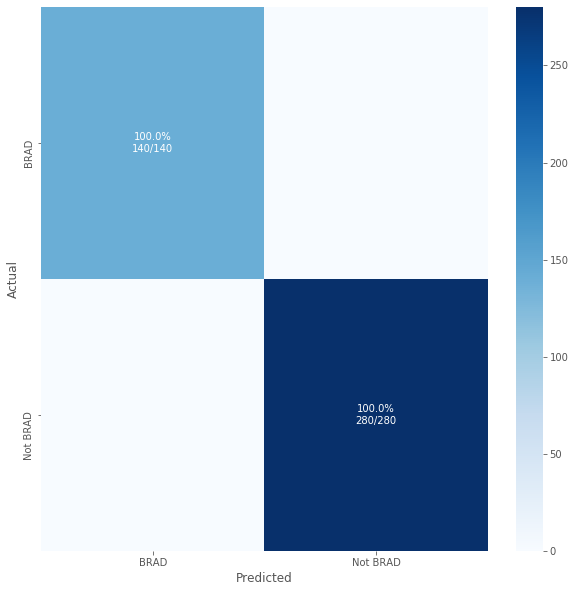

In [54]:
# importing confusion matrix to compare actual test labels vs the predicted by model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

y_test_labels = np.where(y_test, 'BRAD', 'Not BRAD')
logreg_pred_labels = np.where(logreg_predicted, 'BRAD', 'Not BRAD')

def plot_cm(y_true, y_pred, figsize=(10,10)):
    """
        Plot for the confusion matrix taking in the labels for the real values and predicted
    """
    
    # implementing the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test_labels, logreg_pred_labels)

# releasing memory allocation
del logreg_pred_labels

Ok wow! We perfectly predicted which samples were _BRAD_ and which were not! Amazing indeed...
Now this type for perfect predictic capabilities should raise concerns about our model. Recall that when something like this occurs, this is known as __Overfitting__ . Moreover, we have a _warning message_ from the sklearn model _"ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT"_ . Our Logistic Regression model did not converged and as a result the paramenters simply reside somewhere on the boundaries.

The message also gives options as to how to _possibly_ achive convergence, either increase the number of iterations the model performs or increase the number of samples in our data. We're going to take this opportunity to explore a way to address such a high feature/dimentional dataset. 

### Principal Component Analysis _(PCA)_

Principar Component Analysis is fundamentally a dimention reduction algorithm, that can be useful for noice filtering, selecting important features, and visualizations of high dimensional data.

PCA's algorithm computes the _principal axes_ in our dataset, which basically means it looks for the maximum variance in our features or variables. The algorithm runs through all the combination of features and calculates vectors for the max variance, basically projecting our original dataset into a plane defined by these vectors. 

We can call the _PCA_ algorithm through sklearn, select the number of components we would like our dataset to be reduced to (by default 2), transform our data, and rerun our Logistic Regression model with this new subset.

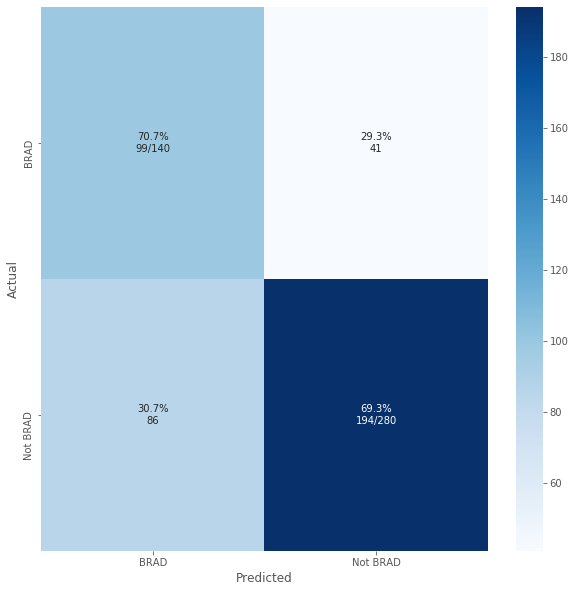

In [15]:
# importing PCA from sklearn
from sklearn.decomposition import PCA

# implementing PCA
pca = PCA(n_components=2) #assume to keep 2 components, but doesn't matter
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))

# features_train = pd.DataFrame(newdf_train)
# features_valid = pd.DataFrame(newdf_valid)  

# model instanciation
lrpca_cls = LogisticRegression(class_weight='balanced') 
# training model
lrpca_cls.fit(pca_X_train, y_train)

# making predictions 
lr_pca_pred = lrpca_cls.predict(pca_X_test)

lrpca_pred_labels = np.where(lr_pca_pred, 'BRAD', 'Not BRAD')

# viz for confusion matrix
plot_cm(y_test_labels, lrpca_pred_labels)

# releasing memory
del lrpca_pred_labels

In [16]:
# calling in the matrics function to check how well our predictions did
from sklearn import metrics

print(metrics.classification_report(lr_pca_pred, y_test), np.mean(y_test==lr_pca_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       235
           1       0.71      0.54      0.61       185

    accuracy                           0.70       420
   macro avg       0.70      0.68      0.68       420
weighted avg       0.70      0.70      0.69       420
 0.6976190476190476


Ok so now that we have implemented PCA and done some hyperparamenter changes to account for the unbalance in our dataset, we have a more realistic model and predictions. 

At this point we would start to wonder about how to tune our [___hyperparameters___](https://en.wikipedia.org/wiki/Hyperparameter_optimization) (think like a 'Knob' on a radio), which remember are _'paramenters'_ intrisic to our model that we can change around, to improve our model. This could be by either changing the weight we give our classes or a number of other paramenters. For our example, let's focus on changing weights and do a _Grid Search_ for a few ratios. 

[___Grid Search___](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search) is a method where we provide a set of parameters for our model to compute over and where we would optain the _optimized_ value for the set of parameters (or _Grid_ ) that we provided. For our grid search, since we have an idea already of the ratio of the binary categories (yes BRAD and Not BRAD), we'll try the rations `[{0:3,1:1}, {0:2,1:1}, {0:1,1:1}, {0:1,1:2}, {0:1,1:3}]` that are close to the value and see which might _optimize_ our logistic regression model. 

In [29]:
from sklearn.model_selection import GridSearchCV

# define model
lr_model = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:3,1:1}, {0:2,1:1}, {0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
param_grid = dict(class_weight=balance)

# define grid search
grid = GridSearchCV(estimator=lr_model, param_grid=param_grid, n_jobs=-1, scoring='f1')
# execute the grid search
grid_result = grid.fit(pca_X_train, y_train)

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.000000 (0.000000) with: {'class_weight': {0: 3, 1: 1}}
0.000000 (0.000000) with: {'class_weight': {0: 2, 1: 1}}
0.146940 (0.021820) with: {'class_weight': {0: 1, 1: 1}}
0.710408 (0.023568) with: {'class_weight': {0: 1, 1: 2}}
0.708725 (0.014147) with: {'class_weight': {0: 1, 1: 3}}
Best: 0.710408 using {'class_weight': {0: 1, 1: 2}}


Ok so we got that the _Optimized_ model value came from the `{'class_weight': {0: 1, 1: 3}}`, great we can plug it in for our weights, get the best model and keep moving on... however, we should notice that the hyperparameter is one of the _boundaries_ in our grid. Given that we are on the boundary of the grid, this means we need to expand our grid for a better value.

Let's try `[{0:1,1:3}, {0:1,1:5}, {0:1,1:10}, {0:1,1:20}, {0:1,1:25},{0:1,1:30}]` and see what it gives us.

In [30]:
# define model
lr_model = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:3}, {0:1,1:5}, {0:1,1:10}, {0:1,1:20}, {0:1,1:25},{0:1,1:30}]
param_grid = dict(class_weight=balance)

# define grid search
grid = GridSearchCV(estimator=lr_model, param_grid=param_grid, n_jobs=-1, scoring='f1')
# execute the grid search
grid_result = grid.fit(pca_X_train, y_train)

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.708725 (0.014147) with: {'class_weight': {0: 1, 1: 3}}
0.640758 (0.019176) with: {'class_weight': {0: 1, 1: 5}}
0.598767 (0.005662) with: {'class_weight': {0: 1, 1: 10}}
0.578998 (0.005444) with: {'class_weight': {0: 1, 1: 20}}
0.574308 (0.004250) with: {'class_weight': {0: 1, 1: 25}}
0.571310 (0.003006) with: {'class_weight': {0: 1, 1: 30}}
Best: 0.708725 using {'class_weight': {0: 1, 1: 3}}


In [50]:
# from sklearn.utils.class_weight import compute_class_weight

# print(compute_class_weight('balanced',[0,1],y_train))
(np.bincount(y_train))

array([1075,  605])

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       340
           1       0.09      0.15      0.11        80

    accuracy                           0.53       420
   macro avg       0.42      0.39      0.40       420
weighted avg       0.63      0.53      0.57       420
 0.5333333333333333


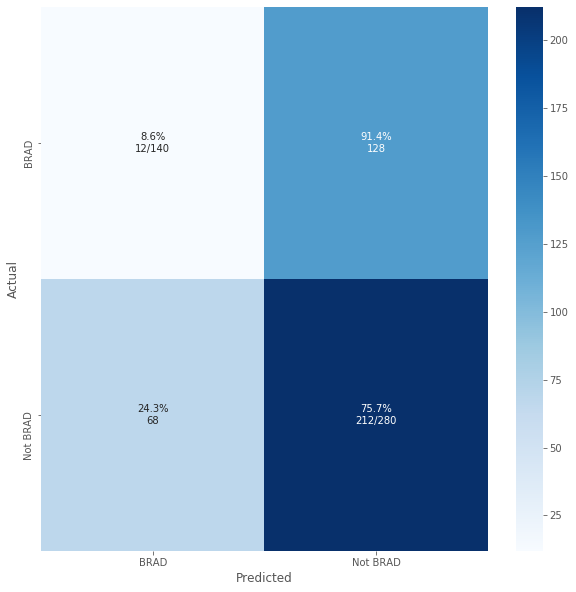

In [52]:
# model instanciation
lrpca_cls = LogisticRegression(class_weight='[{0:605,1:1075}]') 
# training model
lrpca_cls.fit(pca_X_train, y_train)

# making predictions 
lr_pca_pred = lrpca_cls.predict(pca_X_test)

lrpca_pred_labels = np.where(lr_pca_pred, 'BRAD', 'Not BRAD')

print(metrics.classification_report(lr_pca_pred, y_test), np.mean(y_test==lr_pca_pred))

# viz for confusion matrix
plot_cm(y_test_labels, lrpca_pred_labels)

# releasing memory
del lrpca_pred_labels

Ok so we see that with a few tweeks we have found a better model according to our metrics.

We could even ask ourselves if us going for a PCA dimension reduction to only 2 principal conponents was appropriate. To do this we look towards how much variance is explained by the _first N PCs_.

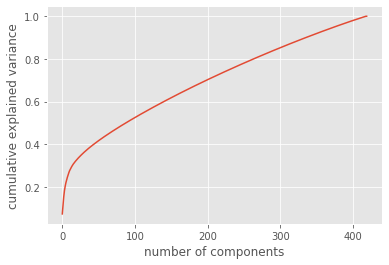

In [55]:
pca = PCA().fit(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Ok this is much more interesting, we see that we need about 300 PCs to account for about 80% of the variance in our dataset, while keeping it in the 10s would acounts to about 30%-40%. A lower dimensionality like 2 and 3 is easy to visualize so we might just want to look at something around those values if for visualization purposes, but lets also calculate how much would the model improve at predicting labels if we increase the PC to 3.

First, let's use the PCA we have with 2 Principal Components to set up a visual and see how well the data has been split between samples that are 'BRAD' and those that are 'NOT BRAD'

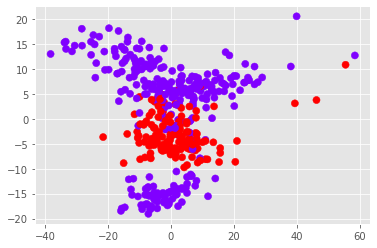

In [58]:
plt.scatter(np.array(pca_X_test)[:, 0], np.array(pca_X_test)[:, 1], c=y_test, s=50, cmap='rainbow');

The visual shows the great power PCA can have in our data analysis. Remember that our dataset was originally of over 50K genes or features and we then projected the data and reduced the dimension of our dataset to only 2 dimensions... and it did a fantastic job at showing a separation for our 2 classes.

Ok now let's proceed to redo our PCA procedure, but for 3 Principal Components now and see how much our Classifier improves.

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       236
           1       0.80      0.61      0.69       184

    accuracy                           0.76       420
   macro avg       0.77      0.75      0.75       420
weighted avg       0.77      0.76      0.76       420
 0.7619047619047619


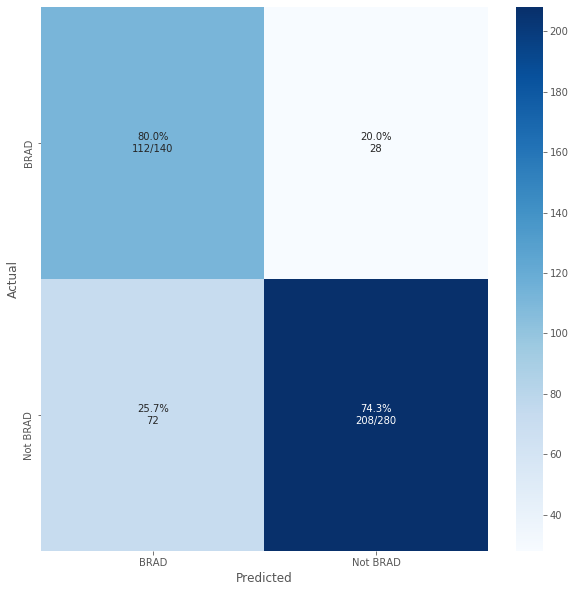

In [59]:
# Rerunning the PCA procedure
pca = PCA(n_components=3) #change to 3 components
newdf_train = pca.fit_transform(X_train)
newdf_valid = pca.transform(X_test)

features_train = pd.DataFrame(newdf_train)
features_valid = pd.DataFrame(newdf_valid)  

lrpca_cls = LogisticRegression(class_weight='balanced') 
lrpca_cls.fit(features_train, y_train)
lr_pca_pred = lrpca_cls.predict(features_valid)

lrpca_pred_labels = np.where(lr_pca_pred, 'BRAD', 'Not BRAD')

plot_cm(y_test_labels, lrpca_pred_labels)
print(metrics.classification_report(lr_pca_pred, y_test), np.mean(y_test==lr_pca_pred))

AWESOME!!! Increasing the PCs to 3 increased our performance metrics grately, going from about mid 70%s to close to mid 80%s in most metrics. This might not always be the case when just increasing a value by 1 PC, but this is the part of the Machine Learning process where the _art of science_ cames in and we _figure out how to tune_ our hyperparaments for better performance. 


### 3.1.2 Decision Trees and Random Forests

_Logistic Regression_ is a good model to start, and works well specifically if we want to try and classify each cancer type individually, that is make 5 models for each of the cancers where we set a '1' or '0' to the sample just as we did for 'BRAD' samples.

### DecisionTree Models

Another machine learning model that performs well and is rather popular for its simplicity of use are _Decision Trees_ . Just like Logistic Regression, Decision Trees work with binary data, so we could rerun our previous example but with the `DecisionTreeClassifier` model from sklearn.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       281
           1       0.99      0.99      0.99       139

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420
 0.9928571428571429


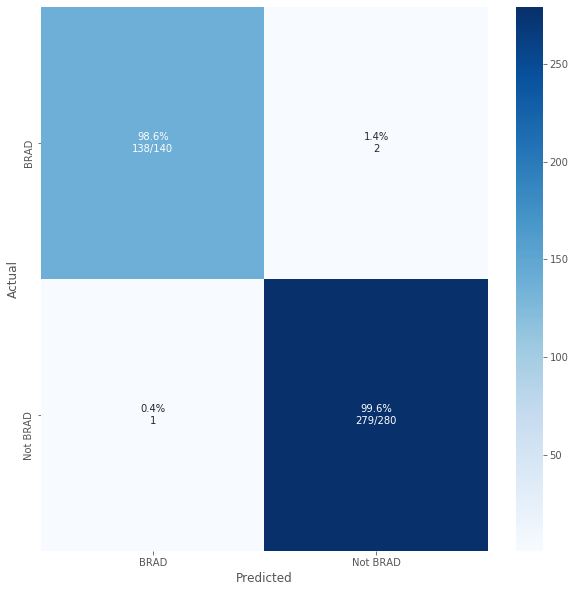

In [60]:
# importing the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
# fit the model
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)

dtc_pred_labels = np.where(dtc_pred, 'BRAD', 'Not BRAD')

plot_cm(y_test_labels, dtc_pred_labels)
print(metrics.classification_report(dtc_pred, y_test), np.mean(y_test==dtc_pred))

The _Decision Tree_ model performed fantastically well in almost all the metrics. This is another one of the advantages of _tree_ models, where even with the base hyperparameters, very little to no tuning, good performance is obtained. 

Another nice _"Feature"_ (no pun intended) of Tree models is that we can see _Feature Importance_ , how much influence a specific feature (in our case gene) had in the model. 

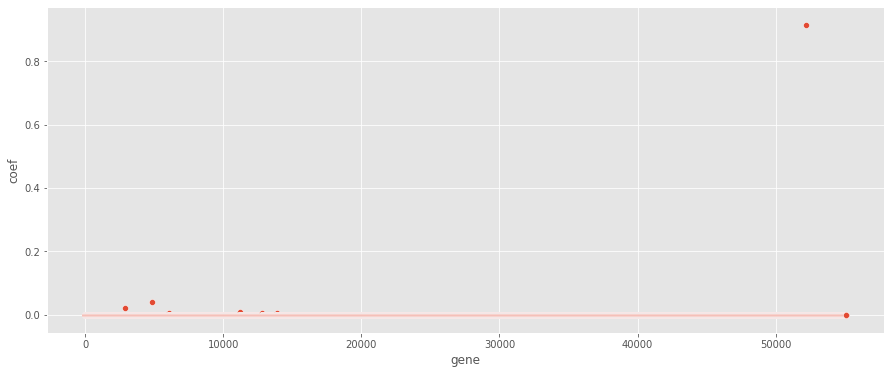

In [168]:
# setting figure parameters for size
fig_dims = (15, 6)
fig, ax = plt.subplots(1,1,figsize=fig_dims)

d2 = pd.DataFrame(dtc_model.feature_importances_.T).reset_index()
d2.columns = ['gene', 'coef']
sns.scatterplot(y='coef',x='gene',data=d2)

___Note:___ _The results may vary for the feature importance given the stochastic nature of the algorithm. We should consider running the example a few times and compare the average outcome or we can run a RandomForest (a emsemble of DecisionTrees)_ .


### RandomForests Models

_"You can't see the forest for the trees"_ , a quote suggesting we might miss the big picture if we focus too much in the small detail. Not to suggest that small details aren't important, but a nice way to say for us _"Hey, why just use one tree model, when we can look at a whole bunch of them"_ .

___Random Forest___ models are an emsemble of Tree models, where we define how many trees we want. These can be used not only for classification but also in regression purposes by running a multitude of these tree models and outputting the class that is the average prediction of the individual trees. One added bonus for our _cancer type classification_ purposes that Randon Forest models bring, is that they allow us to do multiple classes and not just stick to the binary classification for the previous two models. So we will now try to see how well we can classify all the samples in our test data in one go.

We can call our _Classification model_ by calling the function `RandomForestClassifier` from sklearn. First, we need to resplit our data again, since before we only had the binary labels and now we want all the labels for each sample.

In [62]:
# first we make the labels into factors 
# PRAD:1, BRAD:2, COAD:3, LUAD:4, KIRC:5
Y = pd.factorize(data['cancer_type'])[0] + 1

# Now we pass to create train test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [68]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# instanciate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# fit or train the model
rf_model.fit(X_train, y_train)
# make predictions
rf_pred = rf_model.predict(X_test)

# calculate metrics to see how well our model performed
print(metrics.classification_report(rf_pred, y_test))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        69
           2       1.00      0.99      1.00       141
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        66
           5       0.99      1.00      0.99        77

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420



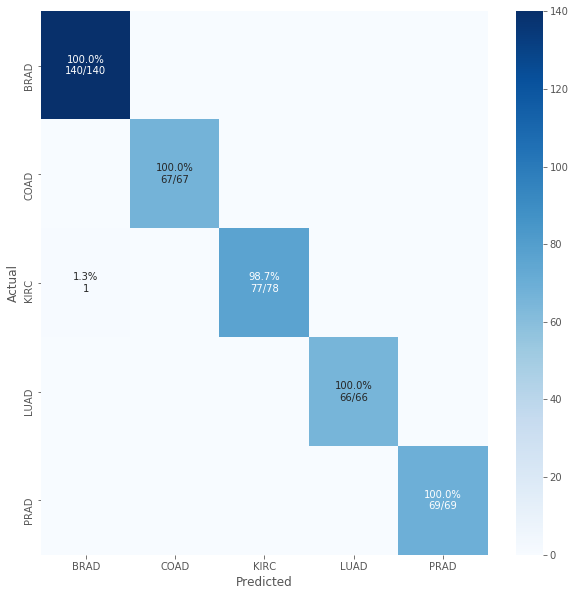

In [69]:
# Creating labels for the cancer type predictions from the numbers back to labels
cond_test = [ y_test == 1, y_test == 2, y_test == 3, y_test == 4, y_test == 5 ]
cond_pred = [ rf_pred == 1, rf_pred == 2, rf_pred == 3, rf_pred == 4, rf_pred == 5 ]
choices = [ 'PRAD', 'BRAD', 'COAD', 'LUAD', 'KIRC']
rf_test_labels = np.select(cond_test, choices, default=np.nan)
rf_pred_labels = np.select(cond_pred, choices, default=np.nan)

plot_cm(rf_test_labels, rf_pred_labels)

In [161]:
def visualize_classifier(model, X, y,X_test, y_test, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [92]:
# implementing PCA
pca = PCA(n_components=3) #assume to keep 2 components, but doesn't matter
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))


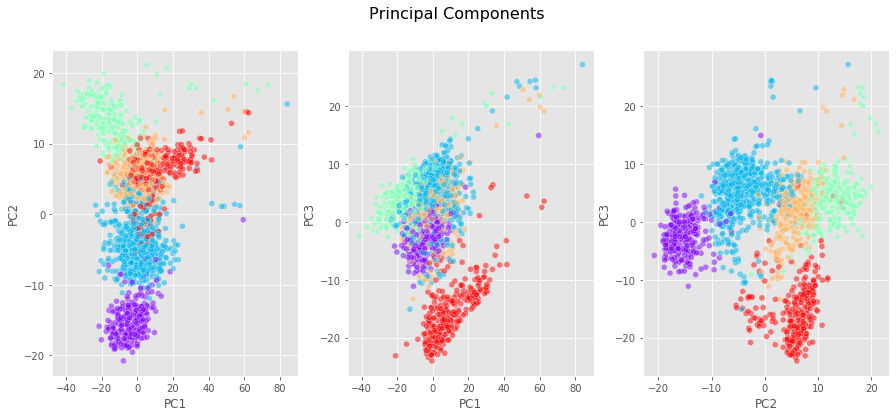

In [131]:
# setting figure parameters for size
fig_dims = (15, 6)
fig, ax = plt.subplots(1,3,figsize=fig_dims)
# Data for a axis from PCs
xline = pca_X_train.iloc[:, 0]
yline = pca_X_train.iloc[:, 1]
zline = pca_X_train.iloc[:, 2]
# plotting
sns.scatterplot(x=xline, y=yline,c=y_train, cmap='rainbow', ax=ax[0], alpha=.5)
sns.scatterplot(x=xline, y=zline,c=y_train, cmap='rainbow', ax=ax[1], alpha=.5)
sns.scatterplot(x=yline, y=zline,c=y_train, cmap='rainbow', ax=ax[2], alpha=.5)
ax[0].set(xlabel="PC1", ylabel="PC2")
ax[1].set(xlabel="PC1", ylabel="PC3")
ax[2].set(xlabel="PC2", ylabel="PC3")

fig.suptitle('Principal Components', fontsize=16)
plt.show()

/home/juansolo/anaconda3/envs/data558/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'clim'


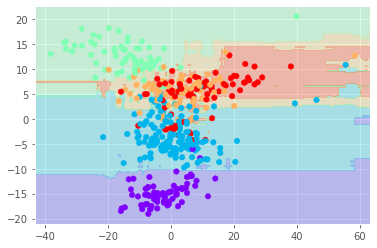

In [162]:
visualize_classifier(rf_model, np.array(pca_X_train)[:,:2], y_train-1,np.array(pca_X_test)[:,:2], y_test-1)

Once again we see that the simple and untuned _Random Forest_ (multiple tree models), has very accurate classification metrics for our gene count data.

### 3.1.3. Support Vector Machines _(SVM)_

The last supervised model we'll use to accomplish our goal of _Classifying Cancer types by using gene count data_ is a __Support Vector Machines (SVM)__ model. 


In [144]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [146]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 43min 9s, sys: 7min 9s, total: 50min 19s
Wall time: 19min 12s
{'svc__C': 1, 'svc__gamma': 0.0005}


In [147]:
svc_model = grid.best_estimator_
svc_pred = svc_model.predict(X_test)

In [148]:
print(metrics.classification_report(svc_pred, y_test), np.mean(y_test==svc_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        79
           2       1.00      0.98      0.99       158
           3       1.00      1.00      1.00        89
           4       0.98      1.00      0.99        85
           5       0.99      1.00      0.99        79

    accuracy                           0.99       490
   macro avg       0.99      1.00      0.99       490
weighted avg       0.99      0.99      0.99       490
 0.9938775510204082


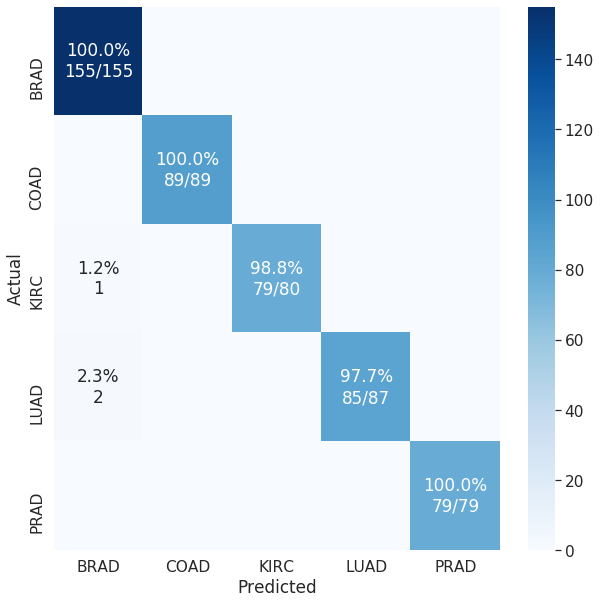

In [150]:
cond_test = [ y_test == 1, y_test == 2, y_test == 3, y_test == 4, y_test == 5 ]
cond_pred = [ svc_pred == 1, svc_pred == 2, svc_pred == 3, svc_pred == 4, svc_pred == 5 ]
choices = [ 'PRAD', 'BRAD', 'COAD', 'LUAD', 'KIRC']
svc_test_labels = np.select(cond_test, choices, default=np.nan)
svc_pred_labels = np.select(cond_pred, choices, default=np.nan)

plot_cm(svc_test_labels, svc_pred_labels)